# Assignment 3 - Using Stan & other exercises

In [1]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt

## 1. Implement models in Stan

### 1. Call center data set

To model the call center data set we use Bayesian inference. To calculate the posterior we use an exponential likelihood with a gamma prior. We want to estimat the number of calls per minute for the 13th hour of the call center data set.

In [2]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call-center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


To remind ourselves let's look at the distribution of the waiting times per hour.

In [3]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

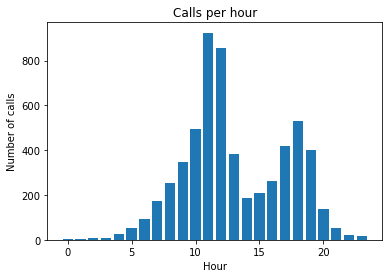

In [4]:
plt.bar(
    x = list(range(len(waiting_times_per_hour))), 
    height = [len(x) for x in waiting_times_per_hour]
)
plt.xlabel('Hour')
plt.ylabel('Number of calls')
plt.title('Calls per hour')
plt.show()

Specifically looking at the 13th hour, we can see the distribtuion of the waiting times of the 13th hour.

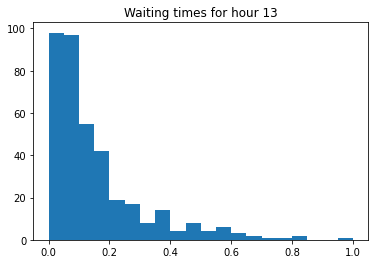

In [5]:
# Plot histogram of waiting times for hour
hour_index = 13
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()